Dataset shape: (772, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

       

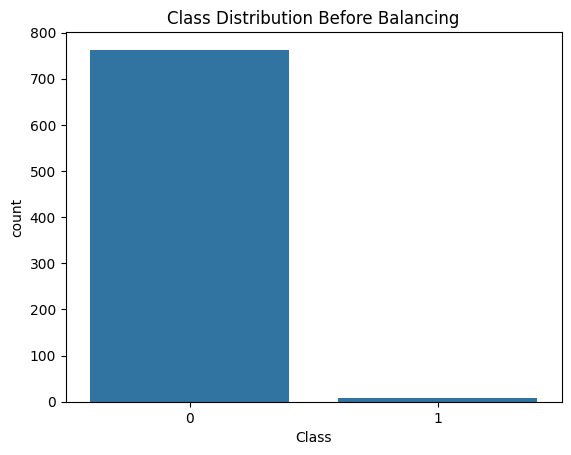


Class distribution after balancing:
Class
0    763
1    763
Name: count, dtype: int64

Accuracy Results (%):
                       Sampling1_RandomOver  Sampling2_SMOTE  \
M1_LogisticRegression                 91.83            91.83   
M2_DecisionTree                      100.00           100.00   
M3_RandomForest                      100.00           100.00   
M4_SVM                                98.04            98.04   
M5_KNN                                98.69            98.69   

                       Sampling3_ADASYN  Sampling4_RandomUnder  \
M1_LogisticRegression             91.83                  91.83   
M2_DecisionTree                  100.00                 100.00   
M3_RandomForest                  100.00                 100.00   
M4_SVM                            98.04                  98.04   
M5_KNN                            98.69                  98.69   

                       Sampling5_SMOTEENN  
M1_LogisticRegression               92.16  
M2_DecisionTree     

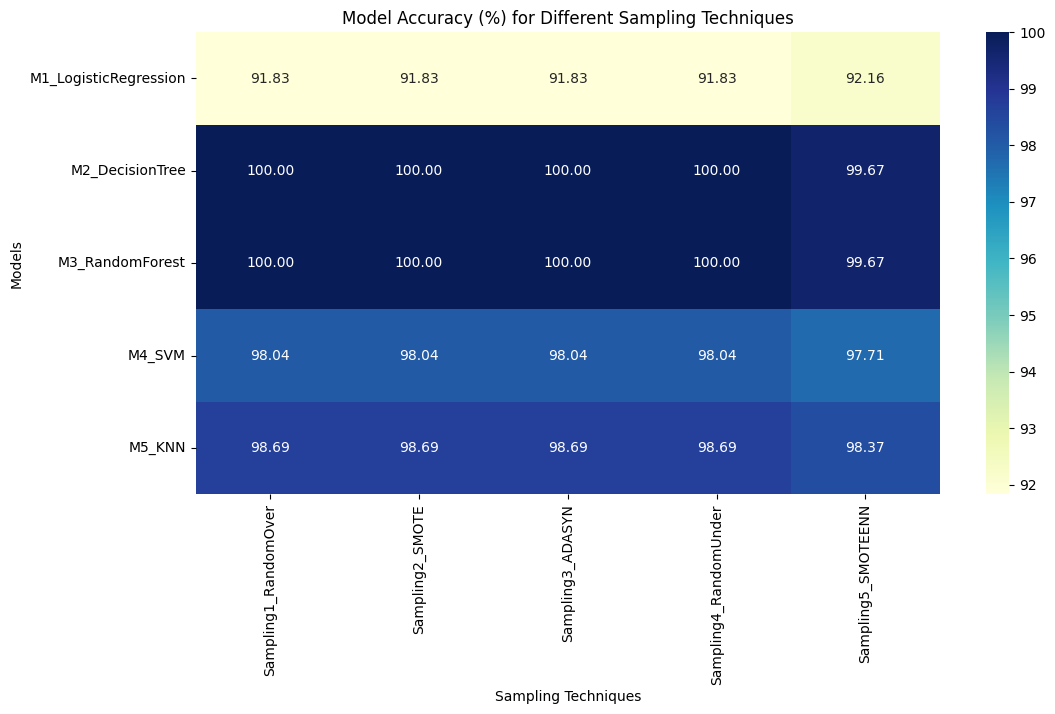


Best Sampling Technique for Each Model:
                      Best Sampling Technique  Best Accuracy (%)
M1_LogisticRegression      Sampling5_SMOTEENN              92.16
M2_DecisionTree          Sampling1_RandomOver             100.00
M3_RandomForest          Sampling1_RandomOver             100.00
M4_SVM                   Sampling1_RandomOver              98.04
M5_KNN                   Sampling1_RandomOver              98.69


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.head())

print("\nClass distribution before balancing:")
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title("Class Distribution Before Balancing")
plt.show()

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_scaled, y)

print("\nClass distribution after balancing:")
print(pd.Series(y_balanced).value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

sampling_techniques = {
    "Sampling1_RandomOver": RandomOverSampler(random_state=42),
    "Sampling2_SMOTE": SMOTE(random_state=42),
    "Sampling3_ADASYN": ADASYN(random_state=42),
    "Sampling4_RandomUnder": RandomUnderSampler(random_state=42),
    "Sampling5_SMOTEENN": SMOTEENN(random_state=42)
}

models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(random_state=42),
    "M3_RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "M4_SVM": SVC(),
    "M5_KNN": KNeighborsClassifier(n_neighbors=5)
}

results = pd.DataFrame(index=models.keys(), columns=sampling_techniques.keys())

for samp_name, sampler in sampling_techniques.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100
        results.loc[model_name, samp_name] = round(acc, 2)

results = results.astype(float)

print("\nAccuracy Results (%):")
print(results)

results.to_csv("results.csv")

plt.figure(figsize=(12, 6))
sns.heatmap(results, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Accuracy (%) for Different Sampling Techniques")
plt.xlabel("Sampling Techniques")
plt.ylabel("Models")
plt.show()

best_sampling = results.idxmax(axis=1)
best_accuracy = results.max(axis=1)

best_results = pd.DataFrame({
    "Best Sampling Technique": best_sampling,
    "Best Accuracy (%)": best_accuracy
})

print("\nBest Sampling Technique for Each Model:")
print(best_results)
